In [100]:
from utils import load_data
from analysis import rate_per_neuron
import matplotlib.pyplot as plt
import scipy
import numpy as np
import os

d = load_data(filename=os.path.join("data","data_28Jul22.mat"))
duration = 2000

In [101]:
rates = rate_per_neuron(idx=d["spkindex_e"],duration=duration)

### Plot distribution of rates

Text(0, 0.5, 'Density')

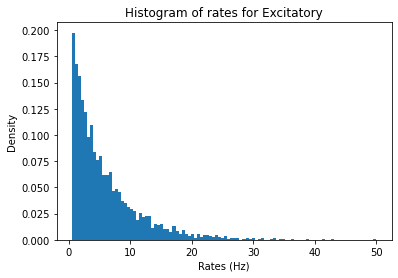

In [102]:
title="Excitatory"
bins=100
plt.figure()
plt.hist(rates,bins=bins,density=1)
plt.title(f"Histogram of rates for {title}")
plt.xlabel("Rates (Hz)")
plt.ylabel("Density")

In [103]:
params = scipy.stats.lognorm.fit(rates)


In [104]:
x = np.arange(0,50,0.1)

In [105]:
pdf = scipy.stats.lognorm.pdf(x, s=params[0], loc=params[1], scale=params[2]) 

Text(0, 0.5, 'Density')

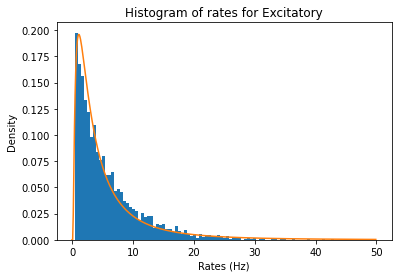

In [106]:
title="Excitatory"
bins=100
plt.figure()
plt.hist(rates,bins=bins,density=1)
plt.plot(x,pdf)
plt.title(f"Histogram of rates for {title}")
plt.xlabel("Rates (Hz)")
plt.ylabel("Density")

In [107]:
cdf=scipy.stats.lognorm.cdf(x, s=params[0], loc=params[1], scale=params[2]) 

Text(0, 0.5, 'Probability')

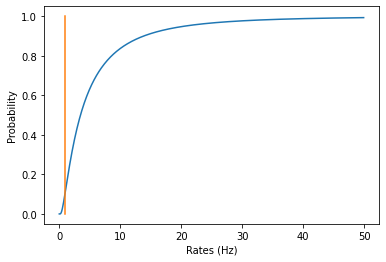

In [108]:
plt.plot(x,cdf)
plt.plot([1,1],[0,1])
plt.xlabel("Rates (Hz)")
plt.ylabel("Probability")

In [109]:
idx = np.where(cdf > 0.05)[0]
v = min(x[idx])

In [110]:
rates_s = np.sort(rates)
idx = np.where(np.sort(rates_s) > v)[0]
rate_90 = np.take(rates_s,idx)

In [111]:
len(rate_90)/len(rates_s)

0.9021998409753512

In [112]:
# Min rate

In [113]:
min(rate_90) 

1.0